Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(420, 8)
(420, 6)
[[ 1.91214438 -0.51027049 -0.44193343 -0.47341363 -0.31488841 -0.38410307]
 [-1.64893594  1.11270897 -0.61977219 -0.64676625  1.28785592  0.99873768]
 [ 1.91214438 -0.51027028 -0.82200995 -0.82011889 -0.31488835 -0.26200369]
 ...
 [-0.45937553 -0.84184024  1.01382735  0.95550021 -1.57037143 -0.20325779]
 [-0.24351375 -0.95259315  1.01382735  0.95550021 -1.3566721  -0.41567962]
 [ 0.59642074 -0.41902261  1.01382735  0.95550021 -0.39502545  0.64852692]]


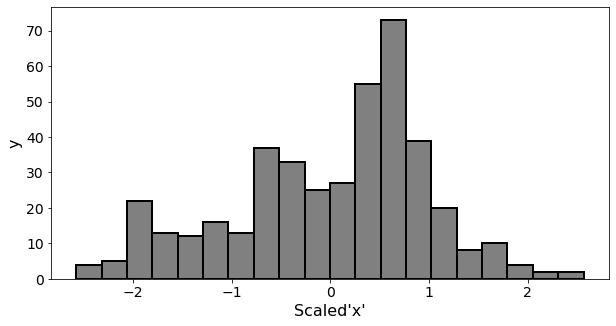

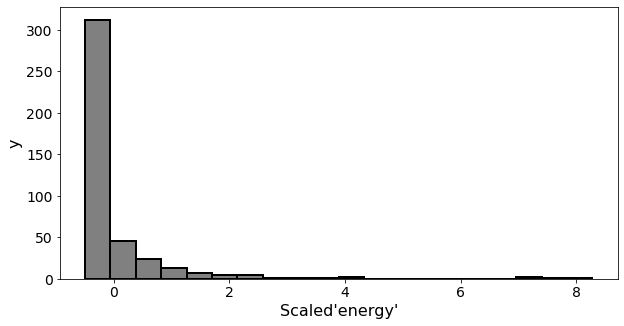

(252, 6) (84, 6) (84, 6)
(420, 3) (420, 3)


In [153]:
from numpy.ma.core import shape
# Import necessary libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset (.csv) using pandas package 
# Upload the file to Google Drive first and then read data from it in Google Drive
from google.colab import drive
drive.mount('/content/drive')
CMS_calori_dataset = pd.read_csv('/content/drive/My Drive/hgcal.csv')

# .head directive on the panda dataframe displays the first n-rows

CMS_calori_dataset.head(n = 10)
# Convert the panda dataframe into numpy 2D array
CMS_calori_dataset_np = CMS_calori_dataset.to_numpy()
# The converted numpy array has the dimension of 420 (rows) x 8 (columns)
print(CMS_calori_dataset_np.shape)
# Extract only x, y, z, eta, phi and energy columns from the dataset and stack them along column direction
# Name this new 2D array CMS_calori_dataset_np_sub. 
CMS_calori_dataset_np_sub=CMS_calori_dataset_np[:,1:7]
# The array should have dimension 420 (rows) x 6 (columns)
print(CMS_calori_dataset_np_sub.shape)

# Create the scaling function
def scale_data(arr):
  scaled_data=np.empty_like(arr)
  #Use i to iterate over all columns.
  for i in range(arr.shape[1]):
  #Standard scaling of all columns  
    mean = np.mean(arr[:, i])
    std = np.std(arr[:, i])
    scaled_data[:, i] = (arr[:, i] - mean) / std

  return scaled_data
# Test the function with CMS_calori_dataset_np_sub
CMS_calori_dataset_np_sub_scaled = scale_data(CMS_calori_dataset_np_sub)

print(CMS_calori_dataset_np_sub_scaled)

# Confirm the data is scaled for 'x' column
plt.figure(figsize = (10, 5))
plt.hist(CMS_calori_dataset_np_sub_scaled[:, 0], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Add proper x-label and y-label 
x=plt.xlabel("Scaled'x'",fontsize=16)
y=plt.ylabel('y',fontsize=16)
plt.show()
# Confirm the data is scaled for 'energy' column
plt.figure(figsize = (10, 5))

plt.hist(CMS_calori_dataset_np_sub_scaled[:, 5], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Add proper x-label and y-label
x=plt.xlabel("Scaled'energy'",fontsize=16)
y=plt.ylabel('y',fontsize=16)
plt.show() 
# Create the splitting function
def split_data(arr, split_proportions, axis):
  # Convert to numpy array
  array=np.array(split_proportions)
  # Get the length of the splitting axis
  n = arr.shape[axis]
  # Calculate the cumulative sum and multiply by the axis length to get the split points
  array1 = np.cumsum(array) * n
  # Drop the last element and convert to integer list
  indices = list(array1[:-1].astype(int))
  split_data = np.split(arr, indices, axis=axis)

  # Returns a list of numpy sub-arrays according to split proportions
  return split_data
  # Test your split function against scaled CMS Calorimieter dataset from exercise 1
sub_data_list_1 = split_data(arr = CMS_calori_dataset_np_sub_scaled, split_proportions = [0.6, 0.2, 0.2], axis = 0)
# Confirm that dataset has been split into correct shapes
# The correct dimensions should be (252, 6) (84, 6) (84, 6)
print(sub_data_list_1[0].shape, sub_data_list_1[1].shape, sub_data_list_1[2].shape)
# Test your split function against scaled CMS Calorimieter dataset from exercise 1
sub_data_list_2 = split_data(arr = CMS_calori_dataset_np_sub_scaled, 
                                                split_proportions = [0.5, 0.5], axis = 1)
# Confirm that dataset has been split into correct shapes
# The correct dimensions should be (420, 3) (420, 3)
print(sub_data_list_2[0].shape, sub_data_list_2[1].shape)



